In [1]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Library for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import os
path = 'D:\Term 2\Machine Learning'
os.chdir(path)

In [2]:
## Importing the train and test dataset

train = pd.read_csv("Train.csv")
test = pd.read_csv("test.csv")

In [3]:
#calculating percentage of null value for each columns
round((train.isnull().sum() / len(train) * 100 ),2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

* Column "Item_Weight" and "Outlet_Size" has missing value more than 15% and total data having almost 45% of missing value.
* But we will not go for dropping those two columns because their might be chance that this two columns can be perdictor variable which high significant.

Assumption of Linear regression:
    * Linear relationship
    * Multivariate normality, etc

* To check the data provided is normal distributed or not
* We will plot a histogram and see

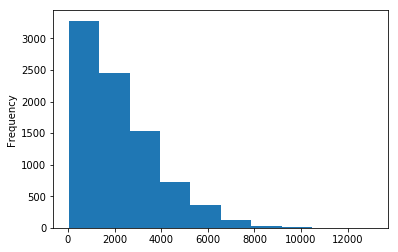

In [4]:
train.Item_Outlet_Sales.plot(kind="hist")
plt.show()

In [5]:
#check the skewness of dependent variable
train.Item_Outlet_Sales.skew()

1.1775306028542798

   * As the above value is greater than 1, that means data is positively skewed
   * We need to go for the square root or log transformation

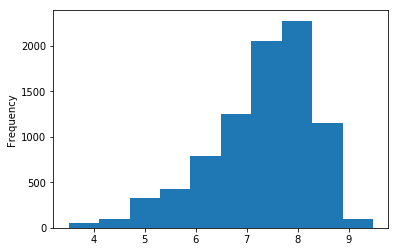

In [6]:
## Using Log transformation

np.log(train.Item_Outlet_Sales).plot(kind="hist")
plt.show()

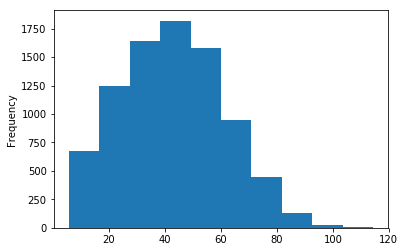

In [7]:
## Using Square root transformation

np.sqrt(train.Item_Outlet_Sales).plot(kind="hist")
plt.show()

    * After log transformation, data become somewhat negative skewed
    * After square root transformation, data became somewhat normal

In [8]:
# we are dropping the column "Item_Identifier" though it will not take any part of predicting sales
# drop column Outlet_Identifier for above reason

train.drop("Item_Identifier", axis=1, inplace=True)
train.drop("Outlet_Identifier", axis=1, inplace=True)

In [9]:
# Imputing the missing value use kNN

from missingpy import KNNImputer

# Creating the KNN imputation object
imputer = KNNImputer(missing_values= "NaN", n_neighbors= 2, metric="masked_euclidean", weights="distance")

# Applying the imputation object on the column where we want to impute the value
train["Item_Weight"] = imputer.fit_transform(train[["Item_Weight"]])

C:\ProgramData\Anaconda3\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\ProgramData\Anaconda3\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))


In [10]:
train.Item_Weight.isnull().sum()

0

In column "Item_Fat_Content" check frequency of each category
* Actually there is 2 category only "low fat" and "regular"
* Replace "Low Fat, low fat, LF" in single 1 and "Regular, reg" in 2 class

In [11]:
def Item_Fat_Content(value):
    if value == 'Low Fat' or value == 'LF' or value == 'low fat':
        num = 1
    elif value == 'Regular' or value == 'reg':
        num = 2
    return num

train['Item_Fat_Content_Num'] = train['Item_Fat_Content'].apply(Item_Fat_Content)

Lets derive Item_Type into numerical category

In [12]:
def Item_Type(value):
    if value == 'Dairy':
        num = 1
    elif value == 'Soft Drinks':
        num = 2
    elif value == 'Meat':
        num = 3
    elif value == 'Fruits and Vegetables':
        num = 4
    elif value == 'Household':
        num = 5
    elif value == 'Baking Goods':
        num = 6
    elif value == 'Snack Foods':
        num = 7
    elif value == 'Frozen Foods':
        num = 8
    elif value == 'Breakfast':
        num = 9
    elif value == 'Health and Hygiene':
        num = 10
    elif value == 'Hard Drinks':
        num = 11
    elif value == 'Canned':
        num = 12
    elif value == 'Breads':
        num = 13
    elif value == 'Starchy Foods':
        num = 14
    elif value == 'Others':
        num = 15
    elif value == 'Seafood':
        num = 16
    return num

train['Item_Type_Num'] = train['Item_Type'].apply(Item_Type)

Converting Outlet_size into numerical

In [13]:
#replace "NaN" with "small"
train["Outlet_Size"] = train["Outlet_Size"].replace({np.nan:"Small"})
# Lets check again "Outtlet_Size" column
train.Outlet_Size.isnull().sum()

0

In [14]:
def Outlet_Size(value):
    if value == 'Medium':
        num = 2
    elif value == 'High':
        num = 3
    elif value == 'Small':
        num = 1
    return num

train['Outlet_Size_Num'] = train['Outlet_Size'].apply(Outlet_Size)

Converting Outlet_Type into numerical

In [15]:
def Outlet_Type(value):
    if value == 'Supermarket Type1':
        num = 1
    elif value == 'Supermarket Type2':
        num = 2
    elif value == 'Supermarket Type3':
        num = 3
    elif value == 'Grocery Store':
        num = 4
    return num

train['Outlet_Type_Num'] = train['Outlet_Type'].apply(Outlet_Type)

Converting Outlet_Location_type into numerical

In [16]:
def Outlet_Location_Type(value):
    if value == 'Tier 1':
        num = 1
    elif value == 'Tier 2':
        num = 2
    elif value == 'Tier 3':
        num = 3
    return num

train['Outlet_Location_Type_Num'] = train['Outlet_Location_Type'].apply(Outlet_Location_Type)

In [17]:
train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Fat_Content_Num         0
Item_Type_Num                0
Outlet_Size_Num              0
Outlet_Type_Num              0
Outlet_Location_Type_Num     0
dtype: int64

Final Train Dataset is

In [18]:
final = train
final.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Num,Item_Type_Num,Outlet_Size_Num,Outlet_Type_Num,Outlet_Location_Type_Num
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,1,2,1,1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,2,2,2,2,3
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,3,2,1,1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800,2,4,1,4,3
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,1,5,3,1,3


## Starting the build the Linear Regression Model

### Step 1:
     In this, I am considering the predictors variable are:
        - Item_Visibility,
        - Item_MRP

In [19]:
X = final.loc[:,["Item_Visibility","Item_MRP"]]

Y = np.sqrt(final.loc[:,"Item_Outlet_Sales"]) #before fitting the model making them normalize

In [20]:
#split the data into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6818, 2), (1705, 2), (6818,), (1705,))

In [21]:
#create a linear regression object
lin_reg = LinearRegression()

#fitting the object to our training set
lin_reg.fit(X_train, Y_train)

#predicting the Y by providing test value
y_pred = lin_reg.predict(X_test)

In [22]:
#calculate mean squre error
print("RMSE: ",np.sqrt(mean_squared_error(Y_test, y_pred)))

#calculate R-Squre value
print("R-Squre: ",r2_score(Y_test,y_pred))

RMSE:  15.145801178136114
R-Squre:  0.33657261372115166


In [23]:
coef = pd.DataFrame(X_train.columns)
coef["Co-Efficient"] = pd.Series(lin_reg.coef_.reshape(2,))
coef.rename(columns={0:"Predictors"})

,Predictors,Co-Efficient
0,Item_Visibility,-56.126000
1,Item_MRP,0.165671


* R-Squre value is 33%, that means 33% varience in Sales is explained by "Item_Visibility" and "Item_MRP"
* If you know these 2 features you can gain 33% info to predict sales accurately

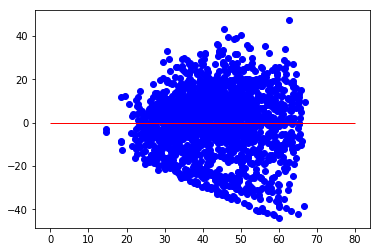

In [24]:
# Residual Plot to check errors are randomly distributed or not
plt.scatter(y_pred, (Y_test - y_pred), color="b")
plt.hlines(y=0, xmin=0, xmax=80, color="r", linewidth=1)
plt.show()

* We can clearly observe that errors are not random that means errors are almost constant in nature
* plot looks like little funnel shape due to varience of not constant errors
* We have already treated outliers using sqrt tranformation

### Step 2:
     In this, I am considering the predictors variable are:
        - Item_Visibility,
        - Item_MRP,
        - Item_Weight

In [25]:
X = final.loc[:,["Item_Weight","Item_Visibility","Item_MRP"]]

Y = np.sqrt(final.loc[:,"Item_Outlet_Sales"])

In [26]:
#split the data into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6818, 3), (1705, 3), (6818,), (1705,))

In [27]:
#create a linear regression object
lin_reg = LinearRegression()

#fitting the object to our training set
lin_reg.fit(X_train, Y_train)

#predicting the Y by providing test value
y_pred = lin_reg.predict(X_test)

In [28]:
#calculate mean squre error
print("RMSE: ",np.sqrt(mean_squared_error(Y_test, y_pred)))

#calculate R-Squre value
print("R-Squre: ",r2_score(Y_test,y_pred))

RMSE:  15.14643248519349
R-Squre:  0.3365173066278069


In [29]:
coef = pd.DataFrame(X_train.columns)
coef["Co-Efficient"] = pd.Series(lin_reg.coef_.reshape(3,))
coef.rename(columns={0:"Predictors"})

,Predictors,Co-Efficient
0,Item_Weight,-0.028195
1,Item_Visibility,-56.148460
2,Item_MRP,0.165719


* Adding "Item_Weight" column is not improving our R-Squre value at all and CO-Efficient is nearer to Zero
* So we can easily drop this column from our model

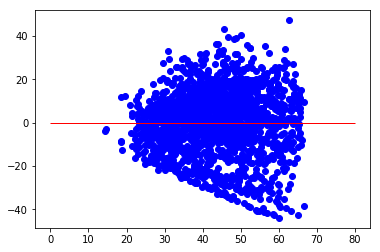

In [30]:
# Residual Plot to check errors are randomly distributed or not
plt.scatter(y_pred, (Y_test - y_pred), color="b")
plt.hlines(y=0, xmin=0, xmax=80, color="r", linewidth=1)
plt.show()

### Step 3:
     In this, I am considering the predictors variable are:
        - Item_Visibility,
        - Item_MRP,
        - Outlet_Establishment_Year

In [31]:
X = final.loc[:,["Outlet_Establishment_Year","Item_Visibility","Item_MRP"]]

Y = np.sqrt(final.loc[:,"Item_Outlet_Sales"])

In [32]:
#split the data into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6818, 3), (1705, 3), (6818,), (1705,))

In [33]:
#create a linear regression object
lin_reg = LinearRegression()

#fitting the object to our training set
lin_reg.fit(X_train, Y_train)

#predicting the Y by providing test value
y_pred = lin_reg.predict(X_test)

In [34]:
#calculate mean squre error
print("RMSE: ",np.sqrt(mean_squared_error(Y_test, y_pred)))

#calculate R-Squre value
print("R-Squre: ",r2_score(Y_test,y_pred))

RMSE:  15.147338028003954
R-Squre:  0.33643797046155444


In [35]:
coef = pd.DataFrame(X_train.columns)
coef["Co-Efficient"] = pd.Series(lin_reg.coef_.reshape(3,))
coef.rename(columns={0:"Predictors"})

,Predictors,Co-Efficient
0,Outlet_Establishment_Year,0.003463
1,Item_Visibility,-56.084359
2,Item_MRP,0.165670


* R-Squre value is increased not that much effecting 
* If you know these 3 features you can gain 33% info to predict sales accurately
* Has 33% info can be achieved by 'Item_visibility' and 'Item_MRP', So we will not Consider Outlet_Establishment_Year

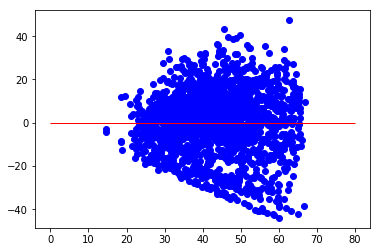

In [36]:
# Residual Plot to check errors are randomly distributed or not
plt.scatter(y_pred, (Y_test - y_pred), color="b")
plt.hlines(y=0, xmin=0, xmax=80, color="r", linewidth=1)
plt.show()

### Step 4:
     In this, I am considering the predictors variable are:
        - Item_Visibility,
        - Item_MRP,
        - Item_Fat_Content

In [37]:
X = final.loc[:,["Item_Fat_Content_Num","Item_Visibility","Item_MRP"]]

Y = np.sqrt(final.loc[:,"Item_Outlet_Sales"])

In [38]:
#split the data into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6818, 3), (1705, 3), (6818,), (1705,))

In [39]:
#create a linear regression object
lin_reg = LinearRegression()

#fitting the object to our training set
lin_reg.fit(X_train, Y_train)

#predicting the Y by providing test value
y_pred = lin_reg.predict(X_test)

In [40]:
#calculate mean squre error
print("RMSE: ",np.sqrt(mean_squared_error(Y_test, y_pred)))

#calculate R-Squre value
print("R-Squre: ",r2_score(Y_test,y_pred))

RMSE:  15.132397768349017
R-Squre:  0.33774630594215815


In [41]:
coef = pd.DataFrame(X_train.columns)
coef["Co-Efficient"] = pd.Series(lin_reg.coef_.reshape(3,))
coef.rename(columns={0:"Predictors"})

,Predictors,Co-Efficient
0,Item_Fat_Content_Num,0.584058
1,Item_Visibility,-56.388274
2,Item_MRP,0.165604


* R-Squre value further increase but not that significantly

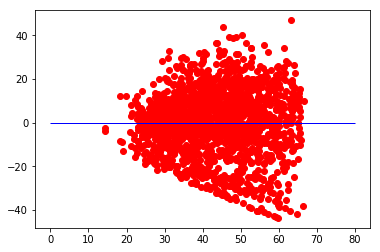

In [42]:
# Residual Plot to check errors are randomly distributed or not
plt.scatter(y_pred, (Y_test - y_pred), color="r")
plt.hlines(y=0, xmin=0, xmax=80, color="b", linewidth=1)
plt.show()

### Step 5:
     In this, I am considering the predictors variable are:
        - Item_Visibility,
        - Item_MRP,
        - Item_Fat_Content,
        - Outlet_Size

In [43]:
X = final.loc[:,["Item_Fat_Content_Num","Item_Visibility","Item_MRP","Outlet_Size_Num"]]

Y = np.sqrt(final.loc[:,"Item_Outlet_Sales"])

In [44]:
#split the data into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6818, 4), (1705, 4), (6818,), (1705,))

In [45]:
#create a linear regression object
lin_reg = LinearRegression()

#fitting the object to our training set
lin_reg.fit(X_train, Y_train)

#predicting the Y by providing test value
y_pred = lin_reg.predict(X_test)

In [46]:
#calculate mean squre error
print("RMSE: ",np.sqrt(mean_squared_error(Y_test, y_pred)))

#calculate R-Squre value
print("R-Squre: ",r2_score(Y_test,y_pred))

RMSE:  14.712583162470949
R-Squre:  0.3739820966193864


In [47]:
coef = pd.DataFrame(X_train.columns)
coef["Co-Efficient"] = pd.Series(lin_reg.coef_.reshape(4,))
coef.rename(columns={0:"Predictors"})

,Predictors,Co-Efficient
0,Item_Fat_Content_Num,0.523582
1,Item_Visibility,-50.391054
2,Item_MRP,0.165837
3,Outlet_Size_Num,4.645413


* R-Squre value is 33% to 37%
* That means adding "Outlet_Size" we can improve our prediction of sales

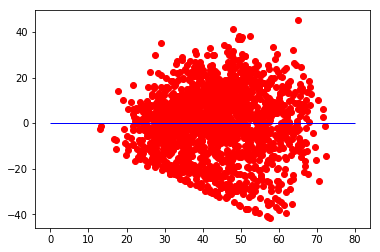

In [48]:
# Residual Plot to check errors are randomly distributed or not
plt.scatter(y_pred, (Y_test - y_pred), color="r")
plt.hlines(y=0, xmin=0, xmax=80, color="b", linewidth=1)
plt.show()

### Step 6:
     In this, I am considering the predictors variable are:
        - Item_Visibility,
        - Item_MRP,
        - Item_Fat_Content,
        - Outlet_Size,
        - Outlet_Location_Type

In [49]:
X = final.loc[:,["Item_Fat_Content_Num","Item_Visibility","Item_MRP",
                 "Outlet_Size_Num","Outlet_Location_Type_Num"]]

Y = np.sqrt(final.loc[:,"Item_Outlet_Sales"])

In [50]:
#split the data into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6818, 5), (1705, 5), (6818,), (1705,))

In [51]:
#create a linear regression object
lin_reg = LinearRegression()

#fitting the object to our training set
lin_reg.fit(X_train, Y_train)

#predicting the Y by providing test value
y_pred = lin_reg.predict(X_test)

In [52]:
#calculate mean squre error
print("RMSE: ",np.sqrt(mean_squared_error(Y_test, y_pred)))

#calculate R-Squre value
print("R-Squre: ",r2_score(Y_test,y_pred))

RMSE:  14.706780687487527
R-Squre:  0.374475787888197


In [53]:
coef = pd.DataFrame(X_train.columns)
coef["Co-Efficient"] = pd.Series(lin_reg.coef_.reshape(5,))
coef.rename(columns={0:"Predictors"})

,Predictors,Co-Efficient
0,Item_Fat_Content_Num,0.518985
1,Item_Visibility,-50.355468
2,Item_MRP,0.165831
3,Outlet_Size_Num,4.760922
4,Outlet_Location_Type_Num,-0.199355


* R-Squre value further increase but not that significantly

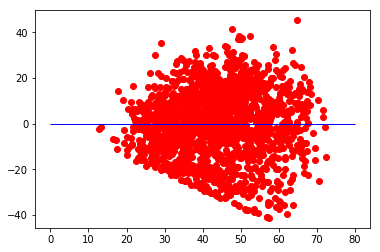

In [54]:
# Residual Plot to check errors are randomly distributed or not
plt.scatter(y_pred, (Y_test - y_pred), color="r")
plt.hlines(y=0, xmin=0, xmax=80, color="b", linewidth=1)
plt.show()

### Step 7:
     In this, I am considering the predictors variable are:
        - Item_Visibility,
        - Item_MRP,
        - Item_Fat_Content,
        - Outlet_Size,
        - Outlet_Location_Type
        - Outlet_Type

In [55]:
X = final.loc[:,["Item_Fat_Content_Num","Item_Visibility","Item_MRP",
                 "Outlet_Size_Num","Outlet_Location_Type_Num","Outlet_Type_Num"]]

Y = np.sqrt(final.loc[:,"Item_Outlet_Sales"])

In [56]:
#split the data into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6818, 6), (1705, 6), (6818,), (1705,))

In [57]:
#create a linear regression object
lin_reg = LinearRegression()

#fitting the object to our training set
lin_reg.fit(X_train, Y_train)

#predicting the Y by providing test value
y_pred = lin_reg.predict(X_test)

In [58]:
#calculate mean squre error
print("RMSE: ",np.sqrt(mean_squared_error(Y_test, y_pred)))

#calculate R-Squre value
print("R-Squre: ",r2_score(Y_test,y_pred))

RMSE:  13.683765963704749
R-Squre:  0.4584729341478939


In [59]:
coef = pd.DataFrame(X_train.columns)
coef["Co-Efficient"] = pd.Series(lin_reg.coef_.reshape(6,))
coef.rename(columns={0:"Predictors"})

,Predictors,Co-Efficient
0,Item_Fat_Content_Num,0.483444
1,Item_Visibility,-25.215517
2,Item_MRP,0.165426
3,Outlet_Size_Num,2.412071
4,Outlet_Location_Type_Num,3.000850
5,Outlet_Type_Num,-5.715450


* R-Squre value is further increased from 37% to 45%
* That means adding "Outlet_Type" we can improve our prediction of sales better than before

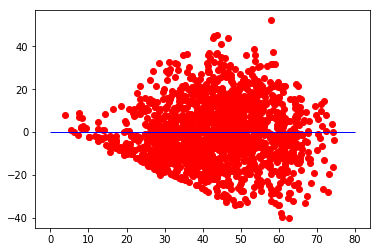

In [60]:
# Residual Plot to check errors are randomly distributed or not
plt.scatter(y_pred, (Y_test - y_pred), color="r")
plt.hlines(y=0, xmin=0, xmax=80, color="b", linewidth=1)
plt.show()

### Step 8:
     In this, I am considering the predictors variable are:
        - Item_Visibility,
        - Item_MRP,
        - Item_Fat_Content,
        - Outlet_Size,
        - Outlet_Location_Type
        - Outlet_Type
        - Item_Type

In [61]:
X = final.loc[:,["Item_Fat_Content_Num","Item_Visibility","Item_MRP","Item_Type_Num",
                 "Outlet_Size_Num","Outlet_Location_Type_Num","Outlet_Type_Num"]]

Y = np.sqrt(final.loc[:,"Item_Outlet_Sales"])

In [62]:
#split the data into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6818, 7), (1705, 7), (6818,), (1705,))

In [63]:
#create a linear regression object
lin_reg = LinearRegression()

#fitting the object to our training set
lin_reg.fit(X_train, Y_train)

#predicting the Y by providing test value
y_pred = lin_reg.predict(X_test)

In [64]:
#calculate mean squre error
print("RMSE: ",np.sqrt(mean_squared_error(Y_test, y_pred)))

#calculate R-Squre value
print("R-Squre: ",r2_score(Y_test,y_pred))

RMSE:  13.689684825147928
R-Squre:  0.45800436184364257


In [65]:
coef = pd.DataFrame(X_train.columns)
coef["Co-Efficient"] = pd.Series(lin_reg.coef_.reshape(7,))
coef.rename(columns={0:"Predictors"})

,Predictors,Co-Efficient
0,Item_Fat_Content_Num,0.514983
1,Item_Visibility,-25.161843
2,Item_MRP,0.165538
3,Item_Type_Num,0.084609
4,Outlet_Size_Num,2.419609
5,Outlet_Location_Type_Num,2.997279
6,Outlet_Type_Num,-5.712968


* R-Squre value further decrease but not that significantly

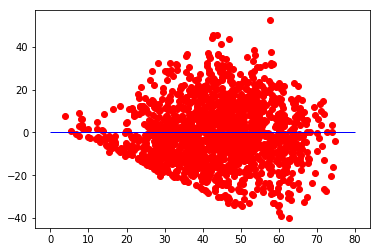

In [66]:
# Residual Plot to check errors are randomly distributed or not
plt.scatter(y_pred, (Y_test - y_pred), color="r")
plt.hlines(y=0, xmin=0, xmax=80, color="b", linewidth=1)
plt.show()

### Step 9:
     In this, I am considering the predictors variable are:
        - Item_Visibility,
        - Item_MRP,
        - Outlet_Size,
        - Outlet_Location_Type
        - Outlet_Type

In [67]:
X = final.loc[:,["Item_Visibility","Item_MRP","Outlet_Size_Num","Outlet_Location_Type_Num","Outlet_Type_Num"]]

Y = np.sqrt(final.loc[:,"Item_Outlet_Sales"])

In [68]:
#split the data into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6818, 5), (1705, 5), (6818,), (1705,))

In [69]:
#create a linear regression object
lin_reg = LinearRegression()

#fitting the object to our training set
lin_reg.fit(X_train, Y_train)

#predicting the Y by providing test value
y_pred = lin_reg.predict(X_test)

In [70]:
#calculate mean squre error
print("RMSE: ",np.sqrt(mean_squared_error(Y_test, y_pred)))

#calculate R-Squre value
print("R-Squre: ",r2_score(Y_test,y_pred))

RMSE:  13.69227628797574
R-Squre:  0.4577991424380694


In [71]:
coef = pd.DataFrame(X_train.columns)
coef["Co-Efficient"] = pd.Series(lin_reg.coef_.reshape(5,))
coef.rename(columns={0:"Predictors"})

,Predictors,Co-Efficient
0,Item_Visibility,-24.990424
1,Item_MRP,0.165482
2,Outlet_Size_Num,2.417811
3,Outlet_Location_Type_Num,2.996249
4,Outlet_Type_Num,-5.716162


* R-Squre value is 45%, that means 45% varience in Sales is explained by following:
    - Item_Visibility,
    - Item_MRP,
    - Outlet_Size,
    - Outlet_Location_Type
    - Outlet_Type

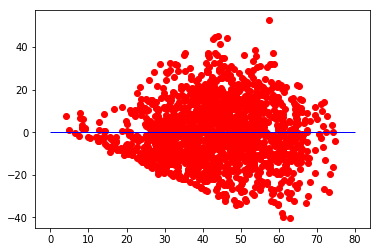

In [72]:
# Residual Plot to check errors are randomly distributed or not
plt.scatter(y_pred, (Y_test - y_pred), color="r")
plt.hlines(y=0, xmin=0, xmax=80, color="b", linewidth=1)
plt.show()

# CONCLUSION:
* From the above all the regression model we understand that 
* using "Item_Visibility","Item_MRP","Outlet_Size","Outlet_Location_Type","Outlet_Type" these columns we can finally create our final model which will give us maximum result

## --------------------------------------------------------------------------------

## Regularization 

#### Ridge Regression

In [73]:
X = final.loc[:,['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size_Num',
      'Outlet_Location_Type_Num','Outlet_Type_Num','Item_Fat_Content_Num','Item_Type_Num']]
Y = final.loc[:,'Item_Outlet_Sales']

In [74]:
from sklearn.linear_model import Ridge

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#create a ridge regression object object
alpha_list = [0.01,0.05,0.5,5,10]

for i in alpha_list:
    ridge_reg = Ridge(alpha = i, normalize=True)
    ridge_reg.fit(X_train, Y_train)
    y_pred1 = ridge_reg.predict(X_test)
    print("R-Squre {} for alpha={}" .format(r2_score(Y_test, y_pred1), i))

R-Squre 0.41983688027745936 for alpha=0.01
R-Squre 0.4178367611570969 for alpha=0.05
R-Squre 0.36380849865902465 for alpha=0.5
R-Squre 0.1260992399804277 for alpha=5
R-Squre 0.07196479171992964 for alpha=10


* for alpha 0.01 above model is giving more R-Squre nearly 42%
* for rest of the alpha value R-Squre value is decreasing

In [75]:
# Fit the model using alpha 0.01

ridge_reg = Ridge(alpha = 0.01, normalize=True)
ridge_reg.fit(X_train, Y_train)
y_pred1 = ridge_reg.predict(X_test)
print("R-Squre: ",r2_score(Y_test, y_pred1))

R-Squre:  0.41983688027745936


In [76]:
ridge_reg.coef_

array([   -2.81929765, -2166.4573205 ,    15.38263975,   -39.987212  ,
        -112.8755391 ,   394.15580983,  -520.04266146,    52.04575295,
           5.54828708])

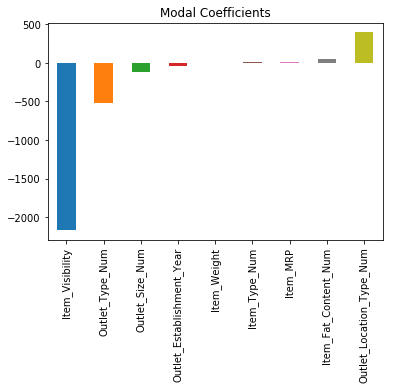

In [77]:
predictors = X_train.columns
coef = pd.Series(ridge_reg.coef_, predictors).sort_values()
coef.plot(kind = 'bar', title='Modal Coefficients')
#plt.hlines(y=0,xmin=-10,xmax=100)

* clearly observe above that when alpha 0.01 the R-Squre value is maximum
* In ridge if we increase the alpha co-efficient will reach to zero but not absolute zero
* It will not drop the column but will put lesser weightage to the co-efficient which variable is not giving that much info about the independancy variable,it will select the column according to its dependancy on sales.

#### Lasso Regression

In [78]:
from sklearn.linear_model import Lasso

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#create a ridge regression object object
alpha_list = [0.001,0.01,0.05,0.5,5,10]

for i in alpha_list:
    lasso_reg = Lasso(alpha = i, normalize=True)
    lasso_reg.fit(X_train, Y_train)
    y_pred2 = lasso_reg.predict(X_test)
    print("R-Squre {} for alpha={}" .format(r2_score(Y_test, y_pred2), i))

R-Squre 0.41995207485396546 for alpha=0.001
R-Squre 0.41995285488003165 for alpha=0.01
R-Squre 0.41983558227125894 for alpha=0.05
R-Squre 0.41310547514046125 for alpha=0.5
R-Squre 0.2570291178774513 for alpha=5
R-Squre 0.08675970968730662 for alpha=10


* clearly observe that when alpha 0.01 the R-Squre value is maximum
* In lasso if we increase the alpha co-efficient will reach to absolute zero
* It is a kind of features extraction, it will select the column according to its dependancy on sales

In [79]:
# Fit the model using alpha 0.01

lasso_reg = Lasso(alpha = 0.01, normalize=True)
lasso_reg.fit(X_train, Y_train)
y_pred2 = lasso_reg.predict(X_test)
print("R-Squre: ",r2_score(Y_test, y_pred2))

R-Squre:  0.41995285488003165


In [80]:
lasso_reg.coef_

array([   -2.6908176 , -2140.77994506,    15.5225205 ,   -41.54391916,
        -130.31856926,   408.1825558 ,  -533.78507524,    50.72135791,
           5.40042803])

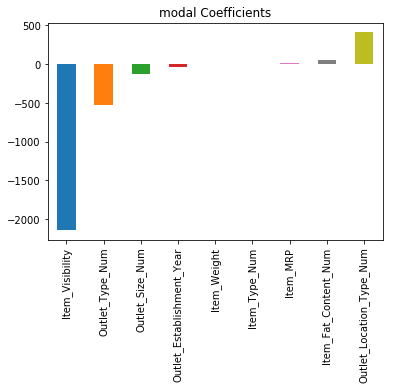

In [81]:
predictors = X_train.columns
coef = pd.Series(lasso_reg.coef_,predictors).sort_values()
coef.plot(kind = 'bar', title = 'modal Coefficients')
#plt.hlines(y=0,xmin=-10,xmax=100)

## --------------------------------------------------------------------------------------------------------

### PREDICT SALES for TEST DATASET
* Similarly we need to do missing value treatment and all the cleaning process what we did for training data otherwise variance will come in prediction of Sales in testdata set 

In [82]:
#dropping two columns as we have dropped train test also
test.drop(["Item_Identifier","Outlet_Identifier"], axis=1, inplace=True)

In [83]:
#checking for missing value
test.isnull().sum()/len(test)

Item_Weight                  0.171801
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282697
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
dtype: float64

In [84]:
# Imputing the missing value use kNN

from missingpy import KNNImputer

# Creating the KNN imputation object
imputer = KNNImputer(missing_values= "NaN", n_neighbors= 2, metric="masked_euclidean", weights="distance")

# Applying the imputation object on the column where we want to impute the value
test["Item_Weight"] = imputer.fit_transform(test[["Item_Weight"]])

C:\ProgramData\Anaconda3\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\ProgramData\Anaconda3\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))


In [85]:
#replace "NaN" with "small"
test["Outlet_Size"] = test["Outlet_Size"].replace({np.nan:"Small"})
# Lets check again "Outtlet_Size" column
test.Outlet_Size.isnull().sum()

0

In [86]:
#checking for missing value
test.isnull().sum()/len(test)

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

In [87]:
test['Outlet_Size_Num'] = test['Outlet_Size'].apply(Outlet_Size)
test['Outlet_Location_Type_Num'] = test['Outlet_Location_Type'].apply(Outlet_Location_Type)
test['Outlet_Type_Num'] = test['Outlet_Type'].apply(Outlet_Type)
test['Item_Fat_Content_Num'] = test['Item_Fat_Content'].apply(Item_Fat_Content)
test['Item_Type_Num'] = test['Item_Type'].apply(Item_Type)
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Size_Num,Outlet_Location_Type_Num,Outlet_Type_Num,Item_Fat_Content_Num,Item_Type_Num
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,2,1,1,1,7
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Small,Tier 2,Supermarket Type1,1,2,1,2,1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Small,Tier 3,Grocery Store,1,3,4,1,15
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Small,Tier 2,Supermarket Type1,1,2,1,1,7
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,2,3,3,2,1


In [88]:
# from the test data set also we are taking those columns wchich were giving maximum R-Squre for training dataset
x_test = test.loc[:,["Item_Visibility","Item_MRP","Outlet_Size_Num","Outlet_Location_Type_Num","Outlet_Type_Num"]]

In [90]:
# As during training time we have done squre root transform of our Sales so, to get back original sales value 
# for test dataset we will do squre again during prediction to get back origanal sales

#predicting "Item_Outlet_Sales" for test data and added as a new column in the original test dataset
test["Item_Outlet_Sales"] = (lin_reg.predict(x_test))

In [92]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Size_Num,Outlet_Location_Type_Num,Outlet_Type_Num,Item_Fat_Content_Num,Item_Type_Num,Item_Outlet_Sales
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,2,1,1,1,7,40.841969
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Small,Tier 2,Supermarket Type1,1,2,1,2,1,37.249744
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Small,Tier 3,Grocery Store,1,3,4,1,15,47.125385
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Small,Tier 2,Supermarket Type1,1,2,1,1,7,49.030954
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,2,3,3,2,1,53.538881


* Above is our test data set where a new column has been added which is nothing but our "Item_Outlet_Sales" according to our best linear regression model which is giving us **R-Squre:** **45%** with least **RMSE:** **13.69**

* Used features in the model will give **45%** information about predicting sales accurately

## -------------------------------------------------------------------------------------